In [1]:
#importing the pacakges and modules required for the program
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.utils import normalize, to_categorical

from keras.datasets import mnist

C:\Users\Neeraj\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Neeraj\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Neeraj\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Neeraj\AppData\Roaming\Python\Python36\s

In [2]:
#Loading the MNIST dataset and pre-processing for the model

(x_train, y_train) , (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

x_train = normalize(x_train,axis = 1)
x_test = normalize(x_test,axis = 1)

In [38]:
#Defining the Model architecture and parameters

model = Sequential()

model.add(Conv2D(16, (3,3), input_shape = x_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(32, (3,3)))
model.add(Activation("relu"))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation("softmax"))

#Specifying the metrics for the model
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


In [39]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
activation_28 (Activation)   (None, 26, 26, 16)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
activation_29 (Activation)   (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 11, 11, 32)        0         
__________

In [40]:
#Training the model
model.fit(x_train,y_train,batch_size=32,epochs=10,validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 24s 446us/step - loss: 0.2327 - acc: 0.9282 - val_loss: 0.0639 - val_acc: 0.9798
Epoch 2/10
54000/54000 [==============================] - 24s 438us/step - loss: 0.0845 - acc: 0.9741 - val_loss: 0.0464 - val_acc: 0.9860
Epoch 3/10
54000/54000 [==============================] - 24s 438us/step - loss: 0.0630 - acc: 0.9802 - val_loss: 0.0447 - val_acc: 0.9870
Epoch 4/10
54000/54000 [==============================] - 24s 438us/step - loss: 0.0495 - acc: 0.9844 - val_loss: 0.0373 - val_acc: 0.9878
Epoch 5/10
54000/54000 [==============================] - 24s 438us/step - loss: 0.0420 - acc: 0.9865 - val_loss: 0.0384 - val_acc: 0.9877
Epoch 6/10
54000/54000 [==============================] - 24s 439us/step - loss: 0.0344 - acc: 0.9893 - val_loss: 0.0409 - val_acc: 0.9902
Epoch 7/10
54000/54000 [==============================] - 24s 438us/step - loss: 0.0301 - acc: 0.9902 - val_loss: 0.0

In [41]:
#Evaluating the model in the Test Set
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 121us/step


[0.036502192473122794, 0.9911]

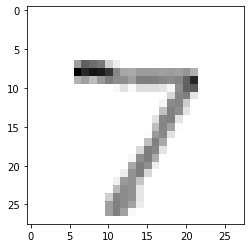

In [42]:
#Visualization using Matplotlib

import matplotlib.pyplot as plt
plt.imshow(x_test[0].reshape(28,28) , cmap = plt.cm.binary)
plt.show()

In [43]:
#Predicting from the model

pred = model.predict(x_test)

In [44]:
pred

array([[5.04329176e-19, 1.15725680e-13, 1.60035124e-10, ...,
        1.00000000e+00, 2.91655507e-13, 1.03304659e-12],
       [4.74662920e-10, 2.50539713e-08, 1.00000000e+00, ...,
        1.11075301e-14, 1.05266436e-12, 1.02541106e-14],
       [7.40432496e-14, 1.00000000e+00, 1.62994531e-11, ...,
        4.35199210e-09, 7.11039672e-10, 1.21381594e-12],
       ...,
       [1.59776592e-20, 1.93132923e-12, 3.73451998e-15, ...,
        1.15035607e-12, 2.02685424e-09, 8.70980857e-11],
       [1.32217251e-10, 3.33684077e-15, 3.35999865e-15, ...,
        3.85171563e-14, 4.09839504e-06, 8.42592801e-14],
       [2.84830597e-11, 3.15659576e-15, 2.86775066e-11, ...,
        5.98724960e-20, 1.58012266e-11, 4.38763252e-16]], dtype=float32)

In [45]:
import numpy as np
print(np.argmax(pred[0]))

7


In [46]:
model.save('conv-keras-mnist-99.h5')